# Project 2

Mael Illien, Jeremy O'Brien, Vanita Thompson

### Assignment:

1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.

3. What can you infer about each of the distinct groups?


### The Dataset: Kaggle IMBD

We will utilize a [Kaggle dataset of movie data](https://www.kaggle.com/PromptCloudHQ/imdb-data/downloads/imdb-data-from-2006-to-2016.zip/1) that uses IMDB as its source. It's limited to the 1000 most popular movies made from 2006-2016 at the time of the author's data pull. 

In [1]:
# Import modules
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
import io
import requests
from scipy import stats
from pylab import rcParams
import math
%matplotlib inline

### Data and Graphs

I manipulate the dataset to show one row per movie-actor combo, a compound primary key. A movie will be repeated for every actor in  the dataset.

In [2]:
#read csv into pandas as a dataframe(df)
url="https://raw.githubusercontent.com/Vthomps000/DATA620/master/Movies.csv"
s=requests.get(url).content
imdb=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
#preview df
imdb.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
imdb = imdb[['Title','Actors']]
imdb.head(15)

,Title,Actors
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,Sing,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D..."
5,The Great Wall,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau"
6,La La Land,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J...."
7,Mindhorn,"Essie Davis, Andrea Riseborough, Julian Barrat..."
8,The Lost City of Z,"Charlie Hunnam, Robert Pattinson, Sienna Mille..."
9,Passengers,"Jennifer Lawrence, Chris Pratt, Michael Sheen,..."


In [5]:
#separate and pivot csv actor list
(https://stackoverflow.com/questions/50789834/parse-a-dataframe-column-by-comma-and-pivot-python)

from  itertools import product

imdb1 = imdb.applymap(lambda x: x.split(',') if isinstance (x, str) else [x])
imdb2 = pd.DataFrame([j for i in imdb1.values for j in product(*i)], columns=imdb.columns)
imdb2.head(50)

,Title,Actors
0,Guardians of the Galaxy,Chris Pratt
1,Guardians of the Galaxy,Vin Diesel
2,Guardians of the Galaxy,Bradley Cooper
3,Guardians of the Galaxy,Zoe Saldana
4,Prometheus,Noomi Rapace
5,Prometheus,Logan Marshall-Green
6,Prometheus,Michael Fassbender
7,Prometheus,Charlize Theron
8,Split,James McAvoy
9,Split,Anya Taylor-Joy


In [6]:
imdb2['Title'] = (imdb2['Title']).str.strip()
imdb2['Actors'] = (imdb2['Actors']).str.strip()
imdb2.describe

<bound method NDFrame.describe of                         Title            Actors
0     Guardians of the Galaxy       Chris Pratt
1     Guardians of the Galaxy        Vin Diesel
2     Guardians of the Galaxy    Bradley Cooper
3     Guardians of the Galaxy       Zoe Saldana
4                  Prometheus      Noomi Rapace
...                       ...               ...
4030             Search Party  Shannon Woodward
4031               Nine Lives      Kevin Spacey
4032               Nine Lives   Jennifer Garner
4033               Nine Lives      Robbie Amell
4034               Nine Lives      Cheryl Hines

[4035 rows x 2 columns]>

Now we move the data into a NetworkX data structure.

In [7]:
G=nx.from_pandas_edgelist(imdb2,'Title','Actors',edge_attr=True)

In [8]:
#verify type
type(G)

networkx.classes.graph.Graph

Calling info will give us a total number of nodes (number of movies plus number of actors) and edges (total number of movie apperances in the dataset of 1000 movies). We also get average degree, which, in this 2-mode dataset, is a not particularly meaningful mix of average actors listed in the movies in the dataset and average number of the 1000 popular movies in which an actor is listed.

In [9]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 2992\nNumber of edges: 4035\nAverage degree:   2.6972'

The number of edges matches the number of rows from our dataframe, which matches our expectations. Now, let's do some analysis to prepare for visualization. First, is our graph connected?

In [10]:
nx.is_connected(G)

False

In [11]:
nx.number_connected_components(G)

94

In [12]:
nx.is_bipartite(G)

True

It is not connected. I will look at an individual node's connectivity. I'll use the movie Guardians of the Galaxy.

In [13]:
G.degree('Guardians of the Galaxy')

4

In [14]:
G.edges('Guardians of the Galaxy')

EdgeDataView([('Guardians of the Galaxy', 'Chris Pratt'), ('Guardians of the Galaxy', 'Vin Diesel'), ('Guardians of the Galaxy', 'Bradley Cooper'), ('Guardians of the Galaxy', 'Zoe Saldana')])

In [15]:
G.edges('Zoe Saldana')

EdgeDataView([('Zoe Saldana', 'Guardians of the Galaxy'), ('Zoe Saldana', 'Star Trek Beyond'), ('Zoe Saldana', 'Avatar'), ('Zoe Saldana', 'Star Trek Into Darkness'), ('Zoe Saldana', 'The Book of Life'), ('Zoe Saldana', 'Out of the Furnace')])

Based on the idea of the 1000 most popular movies from 2006-2016, it seems that our dataset would be connected. Every movie would have a major cast member in at least one other movie, one would think. Maybe there are some foreign films or documentaries that made the list without any crossover from major cast members.

In order to perform more analysis, we need to isolate the connected component. We'll take the largest using subsetting. 

In [22]:
#Create connected subgraphs
G_connected_list = list(nx.connected_component_subgraphs(G))

In [23]:
#Isolate the largest subgraph
G_connected = G_connected_list[0]
nx.info(G_connected)

'Name: \nType: Graph\nNumber of nodes: 2475\nNumber of edges: 3607\nAverage degree:   2.9147'

In [24]:
#Isolate the second largest subgraph
G_connected_2 = G_connected_list[1]
nx.info(G_connected_2)

'Name: \nType: Graph\nNumber of nodes: 5\nNumber of edges: 4\nAverage degree:   1.6000'

In [25]:
#Isolate the third largest subgraph
G_connected_3 = G_connected_list[2]
nx.info(G_connected_3)

'Name: \nType: Graph\nNumber of nodes: 5\nNumber of edges: 4\nAverage degree:   1.6000'

The movies/actors involved.

In [26]:
G_connected_2.edges()

EdgeView([('Hounds of Love', 'Emma Booth'), ('Hounds of Love', 'Ashleigh Cummings'), ('Hounds of Love', 'Stephen Curry'), ('Hounds of Love', 'Susie Porter')])

In [27]:
G_connected_3.edges()

EdgeView([('Paris pieds nus', 'Fiona Gordon'), ('Paris pieds nus', 'Dominique Abel'), ('Paris pieds nus', 'Emmanuelle Riva'), ('Paris pieds nus', 'Pierre Richard')])

We will just go with the largest subgraph, which we'll rename G.

In [28]:
#Verify bipartite
G=G_connected
nx.is_bipartite(G)

True

In [29]:
#Confirm the connection
nx.is_connected(G)

True

### Visualization

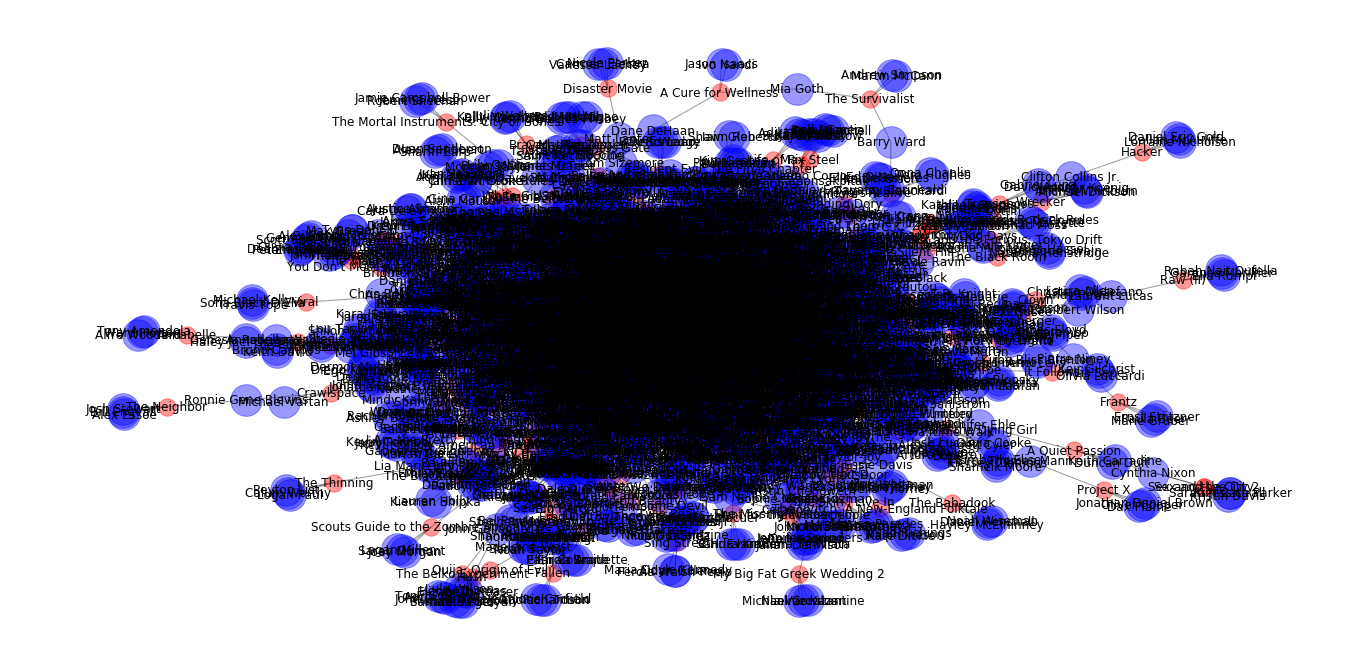

In [30]:
import warnings
warnings.filterwarnings("ignore")

# Visualize the 2-mode networks
Titles, Actors = nx.bipartite.sets(G)
plt.rcParams["figure.figsize"] = (24,12)
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=Titles, node_color='red', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=Actors, node_color='blue', alpha = 0.4, node_size = 1000)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

In [32]:
print('radius =', nx.radius(G))

radius = 11


Any nodes with eccentricities near the radius of a graph are likely in the center. We would guess that these would be either movies with large diverse (in terms of genre breadth) casts or actors who choose a wide variety or role types.

In [33]:
print('center =', nx.center(G))

center = ['Guardians of the Galaxy', 'Prometheus', 'Interstellar', 'Mad Max: Fury Road', 'Inglourious Basterds', 'The Wolf of Wall Street', 'Gone Girl', 'Avengers: Age of Ultron', 'The Departed', 'The Dark Knight Rises', 'Mamma Mia!', 'Into the Woods', 'No Country for Old Men', 'Shutter Island', 'Free Fire', 'Dawn of the Planet of the Apes', 'Spotlight', 'Iron Man', 'Old Boy', "The Huntsman: Winter's War", 'Jackie', 'Fury', 'Les Misérables', 'Zodiac', 'The Devil Wears Prada', 'In Time', 'Hail', 'Caesar!', 'Criminal', 'Wanted', 'Collide', 'Steve Jobs', 'Couples Retreat', 'Atonement', 'Filth', 'The Other Guys', 'American Gangster', 'The Book of Eli', 'Men in Black 3', 'Savages', 'Chappie', 'Elysium', 'A Good Year', 'Jack Reacher', 'Limitless', 'Fantastic Four', 'Snow White and the Huntsman', 'The Finest Hours', 'Moneyball', 'Sunshine', "Daddy's Home", 'Megamind', 'Anna Karenina', 'Pain & Gain', 'Child 44', 'Tinker Tailor Soldier Spy', 'Genius', 'The Hollars', 'Closed Circuit', 'Nymphoman

In [34]:
print('diameter =', nx.diameter(G))

diameter = 18


I will look at centrality metrics using the process in Chapter 3 of our textbook.

In [35]:
def sortSecond(val):
    return val[1]

In [36]:
#create function to retrieve sorted degree list
#ch 3 p. 47 of textbook
#plus internet searches to adapt for ch 3
from operator import itemgetter as ig

def sorted_map(map):
    ms = sorted(map.items(), key=ig(1), reverse=True)
    return ms

In [37]:
d=dict(G.degree())
ds=sorted_map(d)
ds[:10]

[('Mark Wahlberg', 15),
 ('Hugh Jackman', 14),
 ('Christian Bale', 13),
 ('Brad Pitt', 13),
 ('Michael Fassbender', 12),
 ('Scarlett Johansson', 12),
 ('Ryan Gosling', 12),
 ('Emma Stone', 12),
 ('Anne Hathaway', 12),
 ('Robert Downey Jr.', 12)]

Degrees here simply captures the number of times a node appears in the dataset. So Wahlberg's in the most of the top 1000 movies from 2006-2016. Between bad action movies and some surprise hit comedies, this makes sense. Movies would show up here only if they had larger casts included in the dataset.

In [38]:
c=nx.closeness_centrality(G)
cs=sorted_map(c)
cs[:10]

[('Christian Bale', 0.17806247300993233),
 ('Mark Wahlberg', 0.172404181184669),
 ('Brad Pitt', 0.17156726768377253),
 ('Charlize Theron', 0.16942884536364883),
 ('Hugh Jackman', 0.16919710025988238),
 ('Matt Damon', 0.16864349011588275),
 ('Leonardo DiCaprio', 0.16850565318076557),
 ('Anna Kendrick', 0.16827642497619372),
 ('The Dark Knight Rises', 0.16803640562385383),
 ('Michael Fassbender', 0.16786538200569956)]

Closeness centrality measures a node's ability to communicate with others. In our book's example, these are the gossip mongers. 

From a movie industry perspective, this would be a node's ability to reach all other nodes in the network with fewest edges. Notice that, whereas our distance measure of centers highlighted mostly movies, here we get almost all actors.

In [39]:
b=nx.betweenness_centrality(G)
bs=sorted_map(b)
bs[:10]

[('Mark Wahlberg', 0.042193116733958244),
 ('Christian Bale', 0.038022735167341615),
 ('Channing Tatum', 0.03391862711228865),
 ('Hugh Jackman', 0.03183830856383147),
 ('Charlize Theron', 0.028704173024282062),
 ('Brad Pitt', 0.027683278966693006),
 ('Tom Hardy', 0.025643091428860478),
 ('Matthew McConaughey', 0.025445461670917557),
 ('Sharlto Copley', 0.02462683278891274),
 ('Anne Hathaway', 0.02438752430474505)]

Betweenness centrality, according to our textbook, is based on the idea that power resides in bottlenecks between networks. So a cross-genre actor like Hugh Jackman who appears in action films, musicals, and romantic comedies might be an important connector to different groups of actors.

Summing our centrality measures up:

In [40]:
#from pg. 54

names1=[x[0] for x in ds[:10]]
names2=[x[0] for x in cs[:10]]
names3=[x[0] for x in bs[:10]]

names=list(set(names1) | set(names2) | set(names3))
table=[[name,d[name],c[name],b[name]] for name in names]
print(pd.DataFrame(table))

                        0   1         2         3
0       Leonardo DiCaprio  10  0.168506  0.019885
1     Matthew McConaughey  10  0.166375  0.025445
2         Charlize Theron  10  0.169429  0.028704
3               Tom Hardy  12  0.165021  0.025643
4              Matt Damon  10  0.168643  0.017123
5           Anna Kendrick  11  0.168276  0.021553
6           Mark Wahlberg  15  0.172404  0.042193
7      Michael Fassbender  12  0.167865  0.022847
8               Brad Pitt  13  0.171567  0.027683
9            Ryan Gosling  12  0.160026  0.017143
10  The Dark Knight Rises   4  0.168036  0.011149
11           Hugh Jackman  14  0.169197  0.031838
12     Scarlett Johansson  12  0.165374  0.018906
13         Sharlto Copley   9  0.166869  0.024627
14          Anne Hathaway  12  0.167820  0.024388
15         Christian Bale  13  0.178062  0.038023
16             Emma Stone  12  0.156167  0.017697
17      Robert Downey Jr.  12  0.158793  0.013046
18         Channing Tatum  12  0.160462  0.033919


The odd-man out here is probably Sharlto Copley, but a quick glance at his IMDB page reveals why his weird resume makes him a connector between a wide variety of actors.

Now let's look at eigenvector measurements, a metric that captures degree centrality. This looks to detect what the book calls "gray cardinals" by weighting connections to well-connected nodes more than the less ones.

In [42]:
e=nx.eigenvector_centrality_numpy(G)
es=sorted_map(e)
es[:10]

[('Steve Carell', 0.30967516483385416),
 ('Ryan Gosling', 0.2662175791155571),
 ('Emma Stone', 0.24162543342309206),
 ('Crazy', 0.19027759223094992),
 ('Stupid', 0.19027759223094992),
 ('Love.', 0.1902775922309498),
 ('The Big Short', 0.16589684249179923),
 ('Christian Bale', 0.15333277115081573),
 ('Julianne Moore', 0.14821035290109222),
 ('Jennifer Garner', 0.14073946971473844)]

Here we see a possible issue with our data import - the commas in the title of the movie Crazy, Stupid, Love led to duplicate records for that movie and likely cause the cast to have overrated measures here. 

Let's separate the modes.

In [43]:
#create network only containing actors
G_act = bipartite.projected_graph(G, Actors)
nx.is_connected(G_act)

True

In [44]:
print(nx.info(G_act))

Name: 
Type: Graph
Number of nodes: 1575
Number of edges: 5151
Average degree:   6.5410


In [45]:
list(G_act.edges())[:10]

[('Olivia Colman', 'Colin Farrell'),
 ('Olivia Colman', 'Tom Hardy'),
 ('Olivia Colman', 'Andrew Scott'),
 ('Olivia Colman', 'Jessica Barden'),
 ('Olivia Colman', 'Ruth Wilson'),
 ('Olivia Colman', 'Rachel Weisz'),
 ('Jessica Brown Findlay', 'James McAvoy'),
 ('Jessica Brown Findlay', 'Tom Wilkinson'),
 ('Jessica Brown Findlay', 'Andrew Scott'),
 ('Jessica Brown Findlay', 'Daniel Radcliffe')]

We see what we'd expect - the edges now are between actors in the same movie rather than actors and movies in which they star.

We will now look at groupings, first using the built-in find_cliques function and then using a modified version of the island method described in the book.

In [46]:
list(nx.find_cliques(G_act))[:30]

[['Olivia Colman', 'Colin Farrell', 'Rachel Weisz', 'Jessica Barden'],
 ['Olivia Colman', 'Andrew Scott', 'Ruth Wilson', 'Tom Hardy'],
 ['Olivia Colman', 'Andrew Scott', 'Rachel Weisz'],
 ['Mateo Arias', 'Zoey Deutch', 'Israel Broussard', 'Nicholas Braun'],
 ['Jessica Brown Findlay', 'Andrew Scott', 'Jeremy Irvine', 'Tom Wilkinson'],
 ['Jessica Brown Findlay', 'Andrew Scott', 'James McAvoy', 'Daniel Radcliffe'],
 ['Jeff Goldblum', 'Maika Monroe', 'Bill Pullman', 'Liam Hemsworth'],
 ['Stephen Lang', 'Jason Momoa', 'Rose McGowan', 'Ron Perlman'],
 ['Stephen Lang', 'Jane Levy', 'Dylan Minnette', 'Daniel Zovatto'],
 ['Luke Kleintank', 'Thomas Haden Church', 'Josh Wiggins', 'Lauren Graham'],
 ['Ellen DeGeneres', 'Kaitlin Olson', 'Albert Brooks', "Ed O'Neill"],
 ['Geoffrey Arend',
  'Joseph Gordon-Levitt',
  'Chloë Grace Moretz',
  'Zooey Deschanel'],
 ['Riley Keough', 'Jena Malone', 'Jessie Ok Gray', 'Cary Joji Fukunaga'],
 ['Riley Keough', 'McCaul Lombardi', 'Sasha Lane', 'Shia LaBeouf'],


Much of these cliques are just the casts listed for a film. Let's use our version of the island method to find some true islands. Beyond a single degree, will we just see the casts of franchise films, or might we see director-specific cliques?

As a reminder, our starting dataset for analysis is itself as subgraph, so we've already "raised the water" slightly.

In [47]:
#pg. 64 book revised to trim nodes based on degree centrality
    
def trim_nodes(g, degree=1):
    g2=g.copy() #copy graph so that original is not altered adn to avoid error below
    for (node, val) in g.degree(): #must be run on original graph or dictionary will change size during iteration
            if val < degree:
                g2.remove_node(node)
    return g2

In [48]:
#pg. 64 book revised to trim nodes based on degree centrality, return df with additional into

def degree_island_method(g, iterations=5):

    degree = [val for (node, val) in g.degree()]
    
    mn=int(min(degree))
    mx=int(max(degree))
    step=int((mx-mn)/(iterations))
    island_list = [[deg_threshold, trim_nodes(g, deg_threshold)] for deg_threshold in range(mn,mx,step)]
    
    for item in island_list:
        num_nodes = len(item[1])
        item.append(num_nodes)
        num_subgraphs = len(list(nx.connected_component_subgraphs(item[1])))
        item.append(num_subgraphs)
    
    df = pd.DataFrame(island_list, columns = ['Degree Threshold', 'Graph','Number of Nodes', 'Number of Subgraphs'])
    print(df)
    return df


In [49]:
df = degree_island_method(G_act, 8)

   Degree Threshold                                              Graph  \
0                 2  (Olivia Colman, Jessica Brown Findlay, Luke Kl...   
1                 7  (Kristen Stewart, Sharlto Copley, Tim Roth, Ed...   
2                12  (Kristen Stewart, Sharlto Copley, Tim Roth, Ed...   
3                17  (Kristen Stewart, Sharlto Copley, Michael Fass...   
4                22  (Sharlto Copley, Michael Fassbender, Emily Blu...   
5                27  (Sharlto Copley, Michael Fassbender, Brad Pitt...   
6                32  (Michael Fassbender, Brad Pitt, Tom Hardy, Hug...   
7                37  (Brad Pitt, Hugh Jackman, Christian Bale, Mark...   

   Number of Nodes  Number of Subgraphs  
0             1575                    1  
1              420                    1  
2              250                    1  
3              130                    2  
4               61                    2  
5               33                    2  
6               12                    3

Because degree has a different real-life meaning for each node type in the bipartite graph (how many movies an actor has starred in versus how many cast members a movie has), we have tested a modified version of the "island method" on the projected, actors-only graph. 

The '''degree_island_method''' function removes nodes in an iterative, step-wise fashion, increasing the threshold for minimum degree necessary to remain in the graph each time. It differs from the version given in the text because our graph does not have edge weights. 

Interestingly, most of the levels have only one subgraph, suggesting that there is one, main clique.

We can now write a brief function to draw all of the graphs with some custom formatting and labels. We will map node size to degree for easier reading. Note: While in the bipartite graph, and actor's degree indicated the number of movies they starred in, the the '''G_act''' projected graph, it indicates the number of other actors with whom they've shared a credit in the database. So, more movies ***and*** more diverse casting or casting in larger ensembles will all increase the degree.

In [50]:
import warnings
def draw_islands(df, i):
    warnings.filterwarnings("ignore")
    
    G = df['Graph'][i]
    H = df['Graph'][0]
    node_size = [float(H.degree(v))*100 for v in H] #sizes nodes according to connectedness in first iteration
    plt.rcParams.update({'font.size': 22})

    plt.rcParams["figure.figsize"] = (24,24)
    plt.axis('off')
    
    title = str("Island Method Iteration # %d\nThreshold for Inclusion: %s Shared Movie Credits in Database" % (i, df['Degree Threshold'][i]))
    plt.title(title)
    
    pos=nx.spring_layout(G)
    
    nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, alpha=0.8)
    nx.draw_networkx_labels(G, pos=pos, font_size=18, alpha = 0.9)

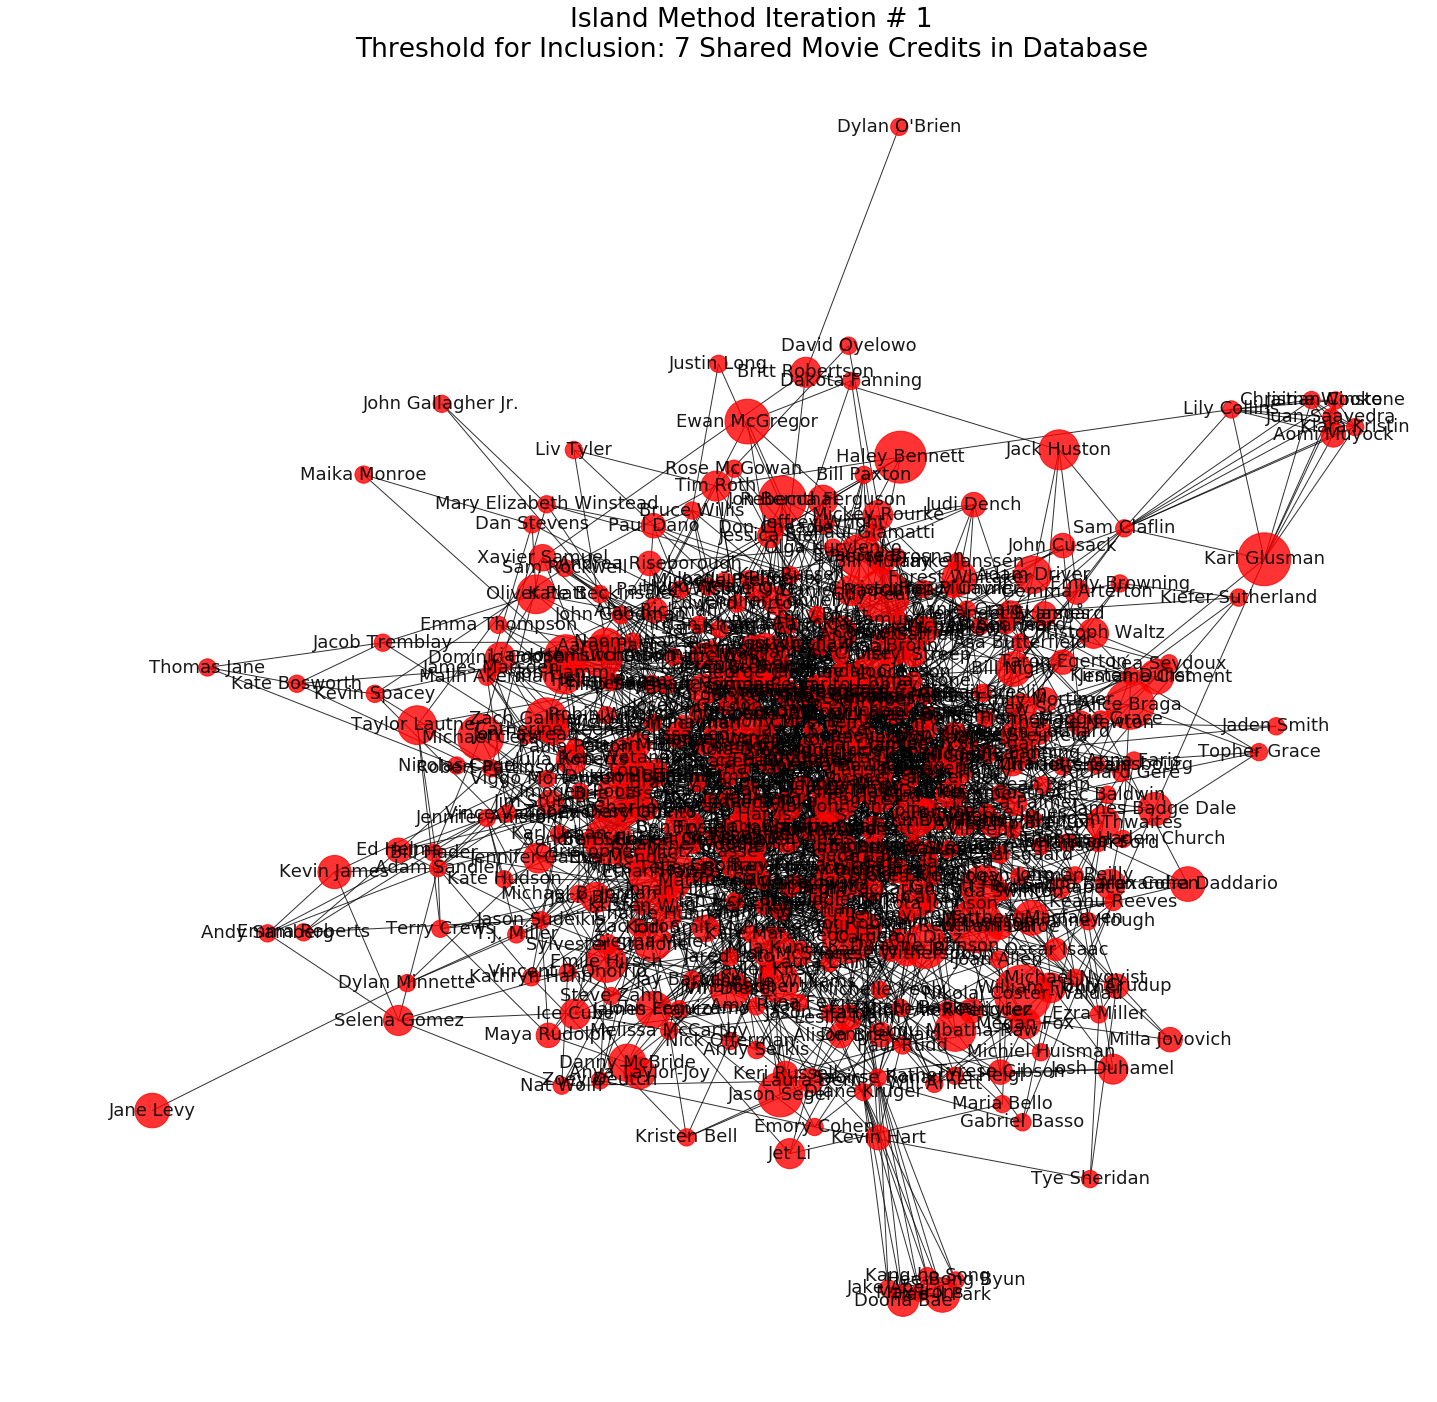

In [279]:
draw_islands(df, 1)

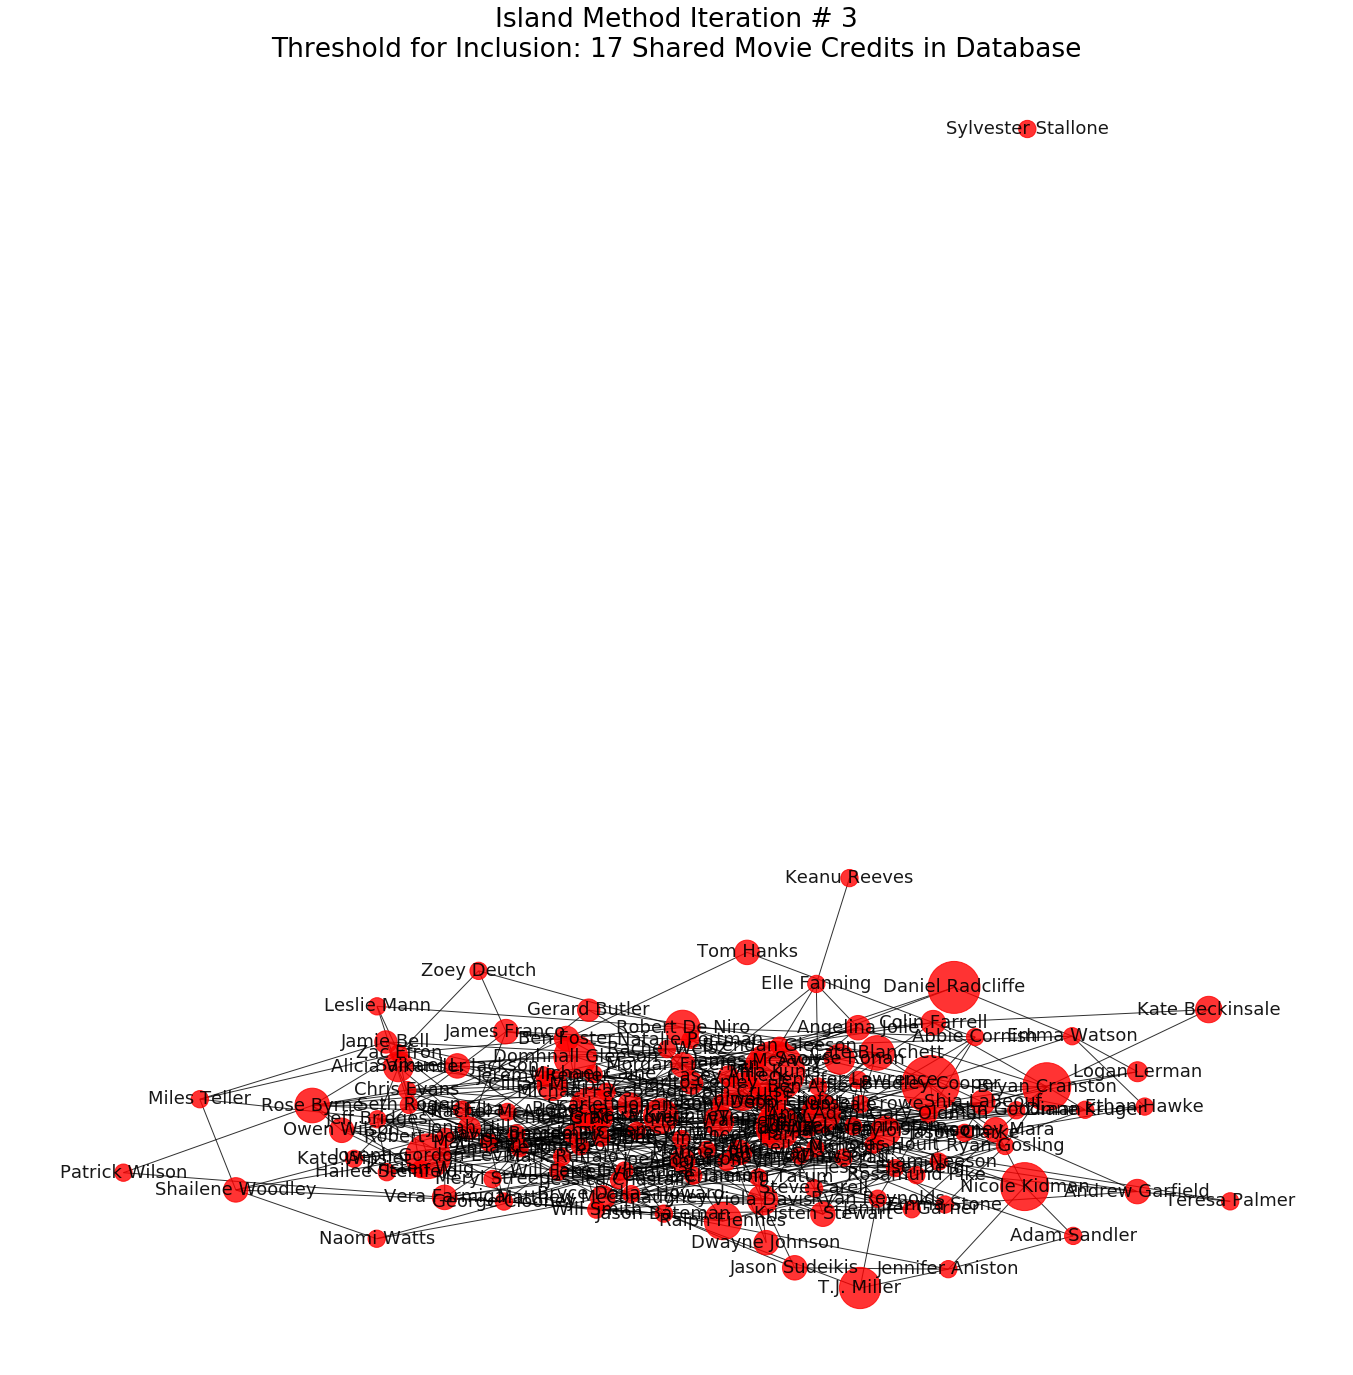

In [51]:
draw_islands(df, 3)

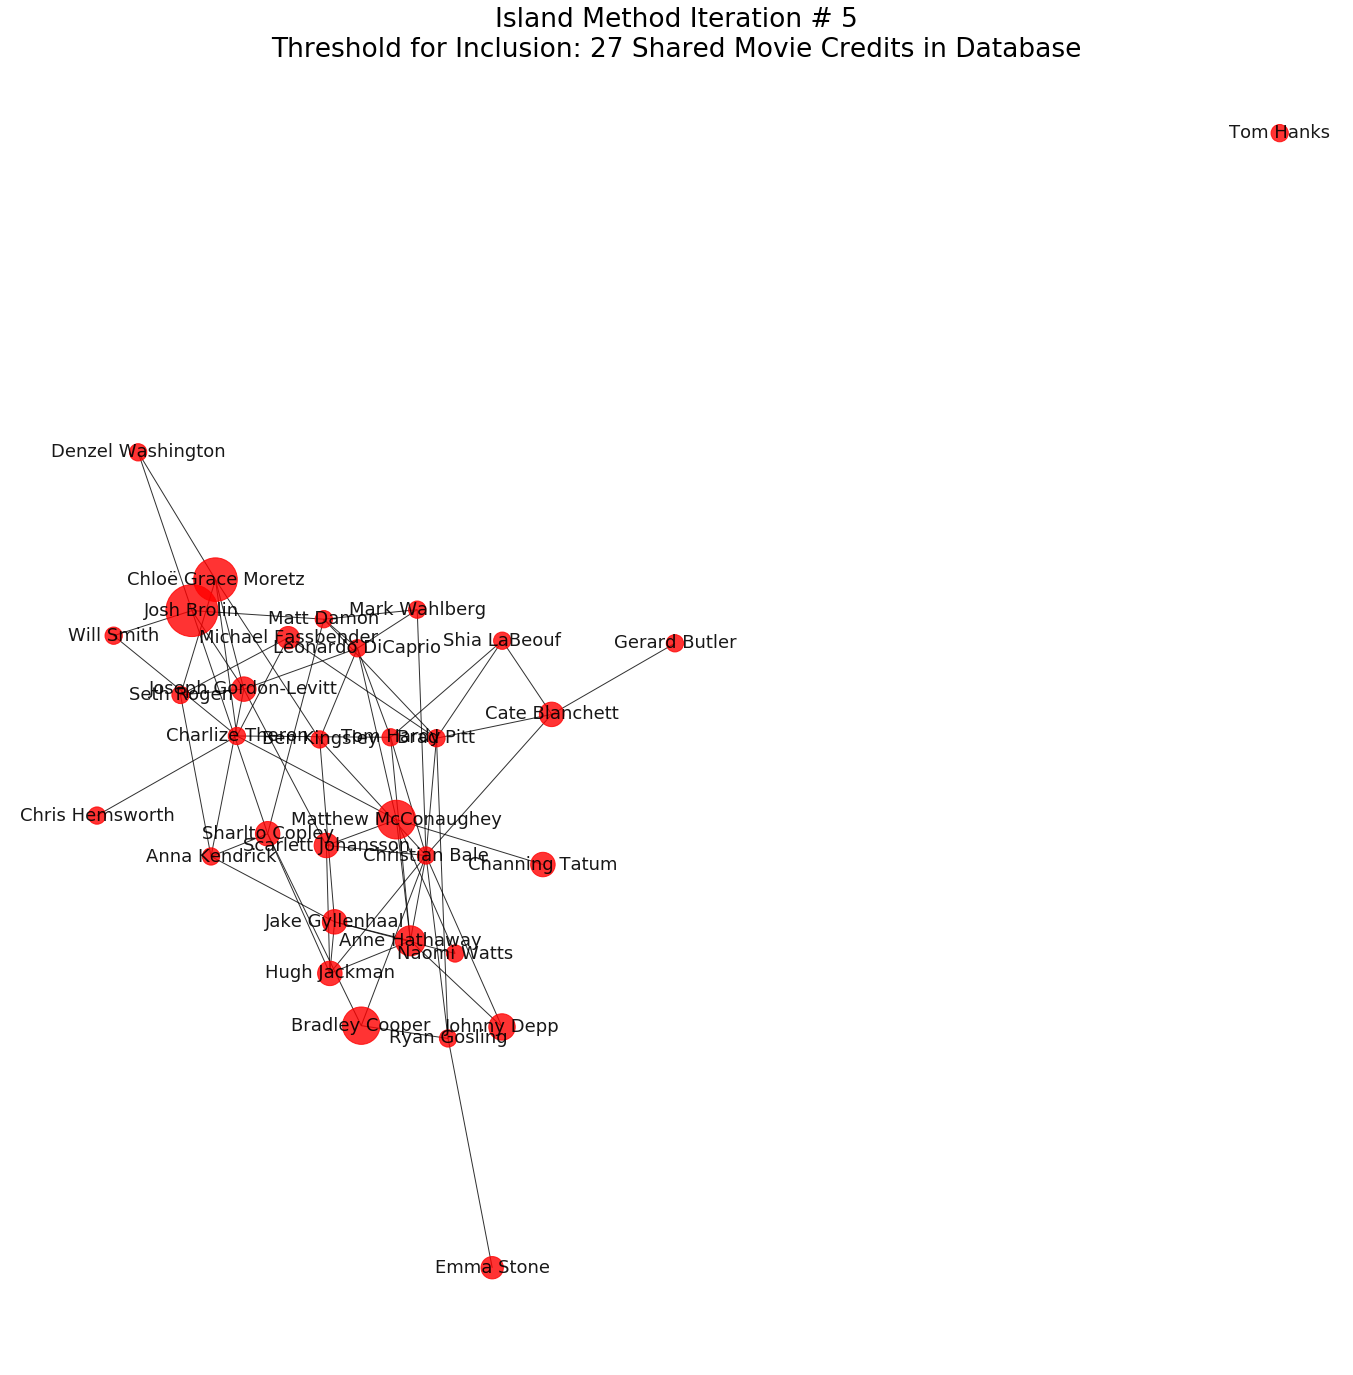

In [52]:
draw_islands(df, 5)

In the graph above, for actors who have been in at least 27 movies, we see a densely connected graph of well-known actors and--all by himself--Tom Hanks. 

What this means is that Tom Hanks has at least 2 degrees of separation from anyone in the central subgraph. Someone get that guy in a movie with Denzel!

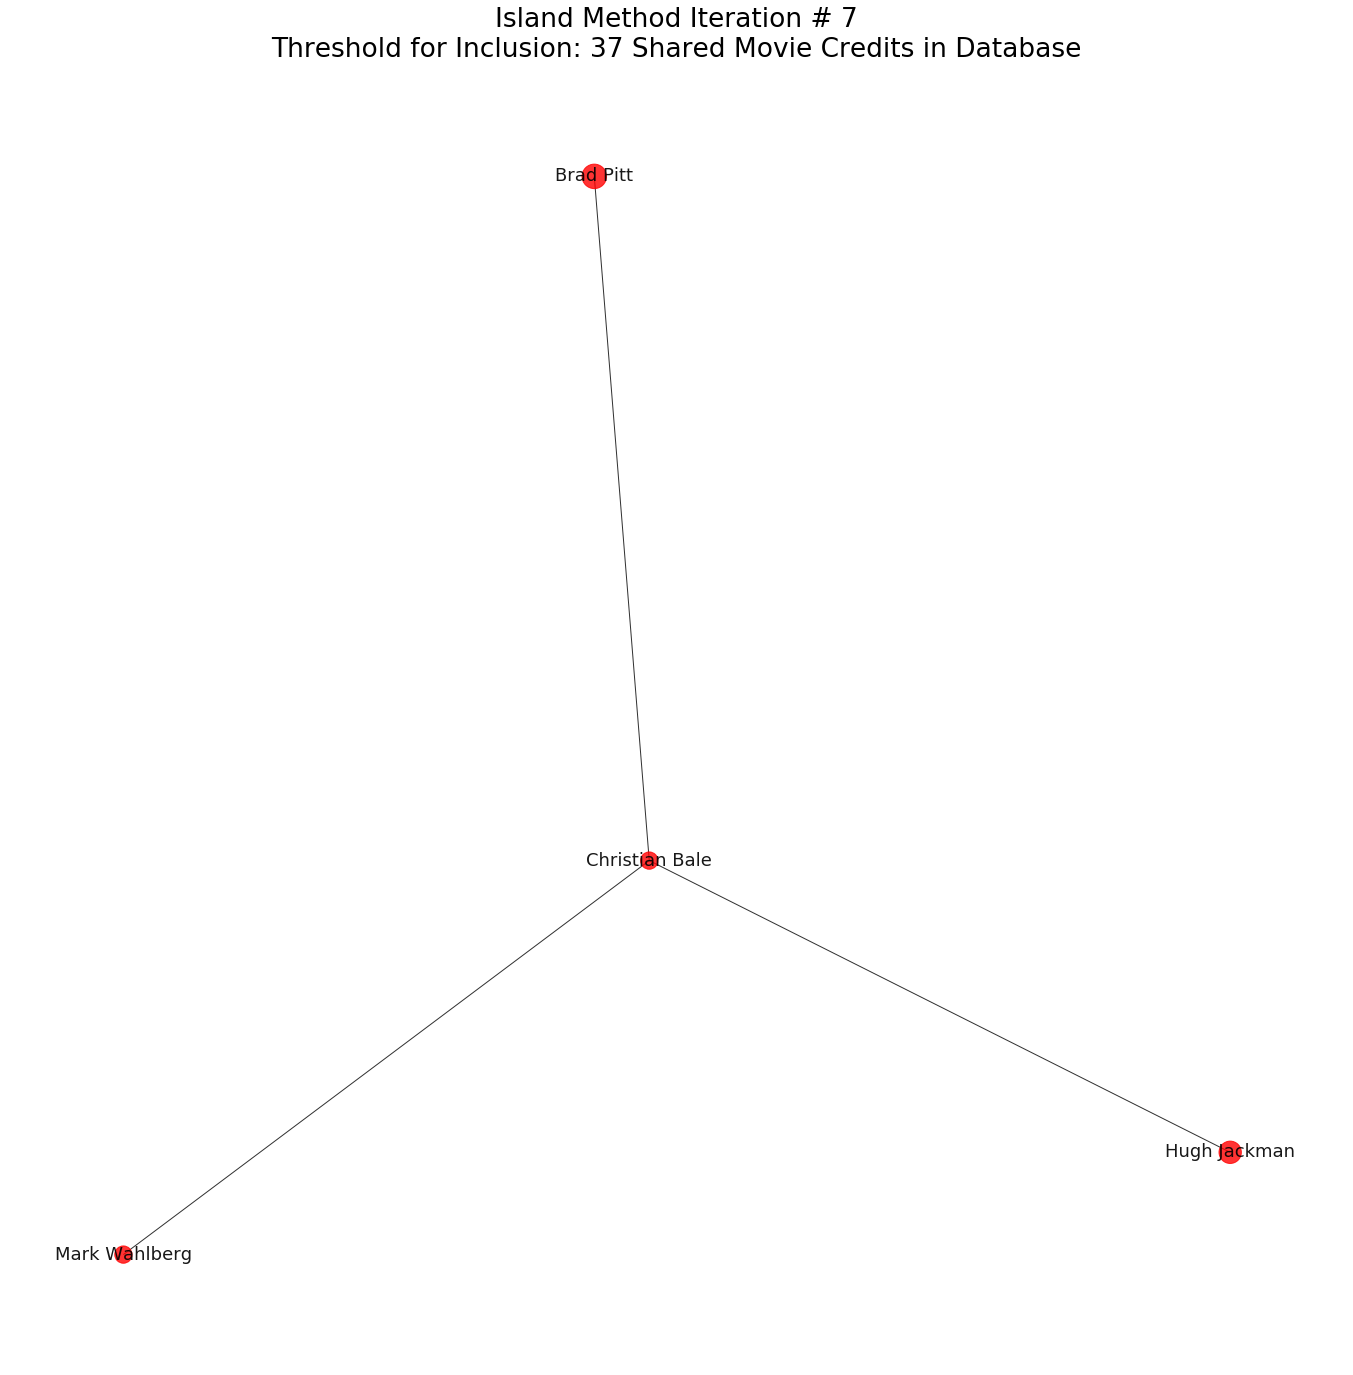

In [53]:
draw_islands(df, 7)

### Conclusion
